In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
np.random.seed(55)

In [44]:
# generate dataset
n=100
x=np.linspace(-5,5,n)
noise=np.random.normal(0,2,n)
y_model=12*np.sin(x)+0.5*(x**2)+2*x+5
y=y_model+noise

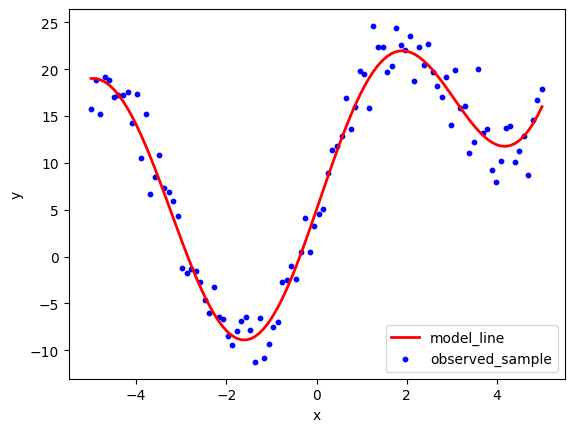

In [45]:
plt.plot(x,y_model,color='red',lw=2,label='model_line')
plt.scatter(x,y,color='blue',s=10,label='observed_sample')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="lower right")
plt.show()

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.model_selection as ms

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=55)

In [48]:
pipeline_polynomial_regression=Pipeline([('poly_features',PolynomialFeatures()),('linear_regression',LinearRegression())])
parameters={'poly_features__degree': np.arange(1, 20)}

In [49]:
degree_selction=ms.GridSearchCV(estimator=pipeline_polynomial_regression,param_grid=parameters,cv=5)

In [50]:
degree_selction.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly_features', PolynomialFeatures()),
                                       ('linear_regression',
                                        LinearRegression())]),
             param_grid={'poly_features__degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [51]:
Best_degree=degree_selction.best_params_['poly_features__degree']
y_test_predict=degree_selction.best_estimator_.predict(x_test.reshape(-1,1))
mse_tset=mean_squared_error(y_test,y_test_predict)
print(Best_degree,mse_tset)

7 2.822958558838909


In [52]:
y_predict=degree_selction.best_estimator_.predict(x.reshape(-1,1))

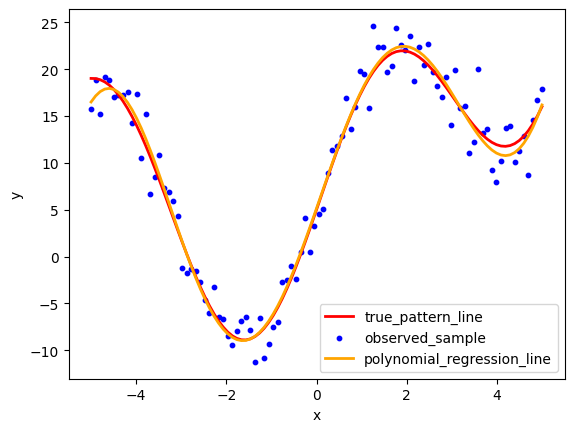

In [53]:
plt.plot(x,y_model,color='red',lw=2,label='true_pattern_line')
plt.scatter(x,y,color='blue',s=10,label='observed_sample')
plt.plot(x,y_predict,color='orange',lw=2,label='polynomial_regression_line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="lower right")
plt.show()